In [5]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline 
# ^This is a "magic function" that allows you to display plots inside notebook cells

# b.) Load the training set...

## Procedure to import the image data

Basically, the following block of code parses images by first parsing strings from a text file that lists the paths to the images of the test set and the training set. It works by iterating over each line of the opened text file object using: 

**for line in open('./faces/train.txt'):**

The code then creates an image variable equal to the image located at the file path that gets fed into: 

**im = misc.imread()**

The file path comes from a text file in which paths are represented by strings separated by spaces (arranged into a number of lines), so we split each line using **split()** (with empty parenthesis to split on blank spaces). We also use **strip()** to strip away any spaces at the beginning and the end of each line (analogously, with empty parenthesis to strip out blank spaces). Here's an explanation as to what the line: **line.strip().split()[0]** does: https://stackoverflow.com/questions/21462879/in-line-split-1-what-does-the-1-in-the-square-brackets-indicate-in-pytho. Basically the command **line.strip().split()** creates a list, because it uses **split()**. Then using [0] references the first entry of the list.

Next, using **reshape(2500, )**, the the code flattens the image into a 0x2500 dimensional array, aka a 1x2500 row vector.

## Display one of the faces from the *training* set.

training attributes matrix shape:  (540, 2500)
training labels matrix shape:  (540,)


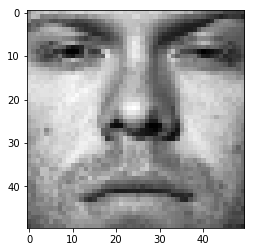

In [6]:
train_labels, train_data = [], []
for line in open('train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print("training attributes matrix shape: ", train_data.shape)
print("training labels matrix shape: ", train_labels.shape)

# generate and plot a random image from the training set
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

## Display one of the faces from the *test* set.

test attributes matrix shape:  (100, 2500)
test labels matrix shape:  (100,)


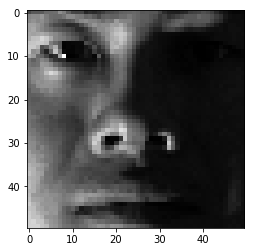

In [7]:
test_labels, test_data = [], []
for line in open('test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print("test attributes matrix shape: ", test_data.shape)
print("test labels matrix shape: ", test_labels.shape)

# generate and plot a random image from the test set
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()



# c.) Average face...
Compute the average face ** *μ* ** from the whole **training** set by summing up every
column in **X** then dividing by the number of faces. Display the average face as a grayscale
image.

The array representing the avg face is:  [ 59.25185185  56.10185185  52.42222222 ...,  67.22222222  64.61851852
  59.27592593]
Average face array dimensions are:  (2500,)


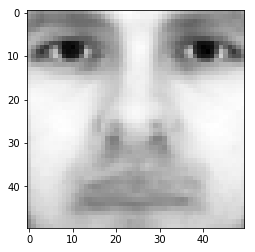

In [8]:
# Iterate over every column, make a list of each column and take its average, 
# write down the average as corresponding entry in row vector

attributeColumnList = []
listOfAverages = []
for column in range(len(train_data[0,:])):
    attributeColumnList = train_data[:,column]
    averageOfColumn = attributeColumnList.mean()
    listOfAverages.append(averageOfColumn)
avgFaceArray = np.array(listOfAverages)

# Test the results
print("The array representing the avg face is: ", avgFaceArray)
print("Average face array dimensions are: ", avgFaceArray.shape)

# Generate and show an image of the average face
plt.imshow(avgFaceArray.reshape(50,50), cmap = cm.Greys_r)
plt.show()
        

# d.) Mean subtraction...
Subtract the average face  ** *μ* ** from every column in **X**. That is, ** $x_i$ ** := ** $x_i$ ** -  ** *$μ_i$* **,
where ** $x_i$ ** is the $i$-th column of the given row of **X**. Pick a face image after mean subtraction from the new **X**
and display that image in grayscale. Do the same thing for the test set ** $X_[test]$ ** using the precomputed
average face ** *μ* ** from part c.).

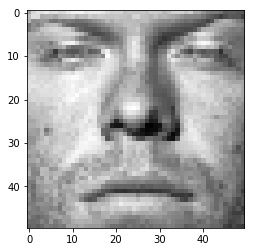

In [30]:
# For the training set:

# Create variables to reference the number of rows and columns in the training data set.
numRowsTrainData = len(train_data)
numCols = len(train_data[0,:])

# Make a matrix by repeating the mu row-vector vertically so that 
# the number of rows equals the number of rows in the training set.
muMatrix = np.repeat([avgFaceArray], numRowsTrainData, axis=0)

    # Test that the avgFaceArray row vector has been made into a matrix of itself repeated as 540 rows.
    # print(avgFaceArray)
    # print(muMatrix[34,:])
    # muMatrix.shape

# Define a new matrix to hold the result, then subtract the muMatrix from the attributes matrix.
    # attributesMatrixMinusMuMatrix = np.full((numRowsTrainData, numCols), 0, dtype=float)
    # Question, Vijay, why don't we need the line above^ ?
train_dataMinusMuMatrix = train_data - muMatrix

# Generate and plot an image from the training set
plt.imshow(attributesMatrixMinusMuMatrix[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

<function matplotlib.pyplot.show>

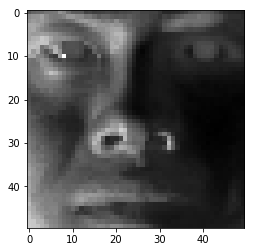

In [34]:
# For the test set:

# Create variables to reference the number of rows and columns in the training data set.
numRowsTestData = len(test_data)

# Make a matrix by repeating the mu row-vector vertically so that 
# the number of rows equals the number of rows in the TEST set.
muMatrixTest = np.repeat([avgFaceArray], numRowsTestData, axis=0)

# Subtract the muMatrixTest from the test_data matrix.
test_dataMinusMuMatrixTest = test_data - muMatrixTest

# Generate and plot an image from the training set.
plt.imshow(test_dataMinusMuMatrixTest[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show

# e.) Eigenface...